# <center>Assignment 8</center>

### Instructions:

1. Solve below assignment problems in the colab notebook only and submit the same on or before the deadline.
* Naming convention for the colab notebook file should be email_assignment_7.ipynb
* Do not copy & paste the code from online. If we do so, you will be rewarded with 0 score for the respective question.
* If you have any queries, please reach out the assignments channel in Microsoft Teams.
* You can refer to online resources for solving these questions but don’t copy the code.

### Question:1
---


## Create a Logistic Regression model for the Titanic Dataset

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



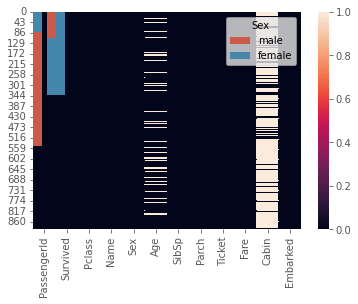

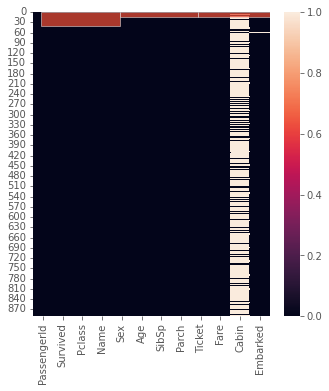

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head()
sns.countplot(x='Survived',data=titanic_data)
#Male vs Female Survived
sns.countplot(x='Survived',data=titanic_data,hue='Sex')
#Check for null
titanic_data.isna()
#Check how many values are null
titanic_data.isna().sum()
#Visualize null values
sns.heatmap(titanic_data.isna())
#find the % of null values in age column
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100
#find the % of null values in cabin column
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100
#find the distribution for the age column
sns.displot(x='Age',data=titanic_data)
#fill age column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
#verify null value
titanic_data['Age'].isna().sum()
#visualize null values
sns.heatmap(titanic_data.isna())
#Drop cabin column
titanic_data.drop('Cabin',axis=1,inplace=True)
#see the contents of the data
titanic_data.head()
#convert sex column to numerical values
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender']=gender
titanic_data.head()
#drop the columns which are not required
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic_data.head()
#Seperate Dependent and Independent variables
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']
#import train test split method
from sklearn.model_selection import train_test_split
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression
#Fit  Logistic Regression 
lr=LogisticRegression()
lr.fit(x_train,y_train)
#predict
predict=lr.predict(x_test)
#print confusion matrix 
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

### Question:2
---


## Create a SVM model for the Titanic Dataset

Number of missing Embarked values  2
(891, 11)
(418, 11)
Best parameters: {'C': 1}
Estimated accuracy of this model for unseen data:0.8238


,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


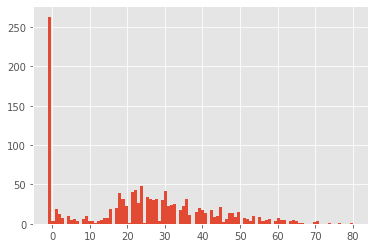

In [ ]:
import pandas as pd
import numpy  as np
np.random.seed(2018)
feature_names=['Age','Pclass','Embarked','Sex']
# load data sets 
train=pd.read_csv('/content/titanic.csv',usecols=['Survived','PassengerId']+feature_names)
test=pd.read_csv('/content/test.csv',usecols=['PassengerId']+feature_names)
# combine train and test for joint processing 
test['Survived']=np.nan
comb=pd.concat([train,test])
comb.head()
print('Number of missing Embarked values ',comb['Embarked'].isnull().sum())
comb['Embarked']=comb['Embarked'].fillna('S')
comb['Embarked'].unique()
comb['NoAge']=comb['Age']==np.NAN
comb['Age']=comb['Age'].fillna(-1)
comb['Age'].hist(bins=100)
comb['Minor']=(comb['Age']<14.0)&(comb['Age']>=0)
# one-hot encode Pclass
comb['P1']=comb['Pclass']==1 
comb['P2']=comb['Pclass']==2
comb['P3']=comb['Pclass']==3
# one-hot encode Embarked
comb['ES']=comb['Embarked']=='S' 
comb['EQ']=comb['Embarked']=='Q'
comb['EC']=comb['Embarked']=='C'
comb['Sex']=comb['Sex'].map({'male':0,'female':1})
# drop Pclass, Embarked and Age features
comb=comb.drop(columns=['Pclass','Embarked','Age'])
comb.head()
df_train=comb.loc[comb['Survived'].isin([np.nan])==False]
df_test=comb.loc[comb['Survived'].isin([np.nan])==True]
print(df_train.shape)
df_train.head()
print(df_test.shape)
df_test.head()
from sklearn.model_selection import GridSearchCV
feature_names=['Sex','P1','P2','P3','EQ','ES','EC','NoAge','Minor']
from sklearn.svm import SVC
model=SVC()
param_grid={'C':[1,2,5,10,20,50]} 
grs=GridSearchCV(model,param_grid=param_grid,cv=10,n_jobs=1,return_train_score=False)
grs.fit(np.array(df_train[feature_names]),np.array(df_train['Survived']))
print("Best parameters:",str(grs.best_params_))
gpd=pd.DataFrame(grs.cv_results_)
print("Estimated accuracy of this model for unseen data:{0:1.4f}".format(gpd['mean_test_score'][grs.best_index_]))
pred=grs.predict(np.array(df_test[feature_names]))
sub=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':pred})
sub.to_csv('AgeSexPclassEmbarked.csv',index=False,float_format='%1d')
sub.head()

### Question:3
---


## Create an MLP model for the Titanic Dataset

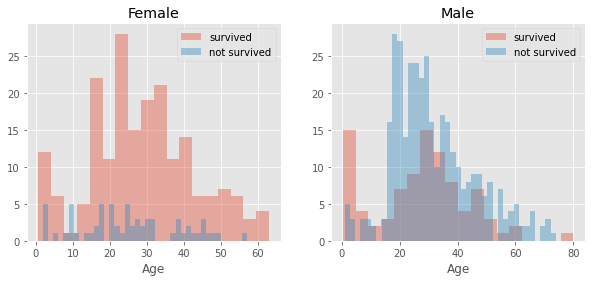

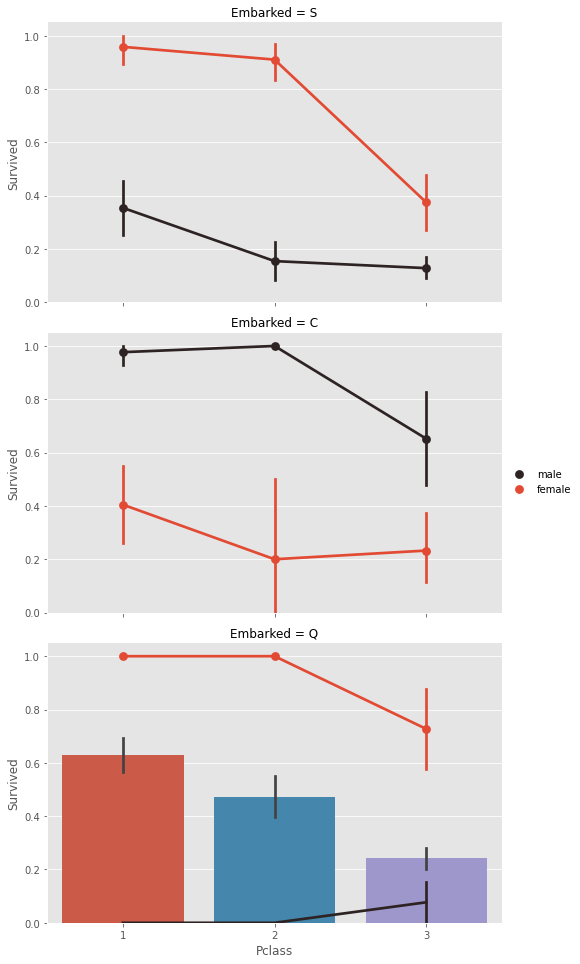

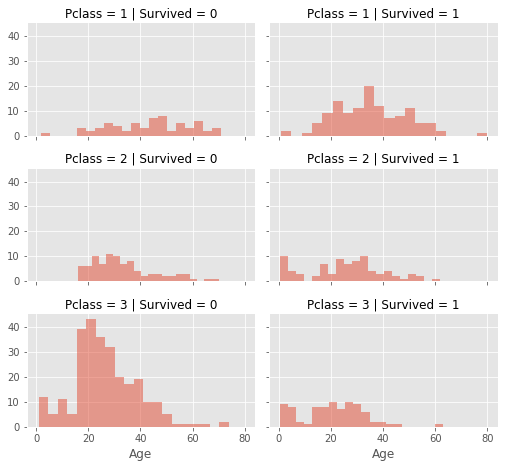

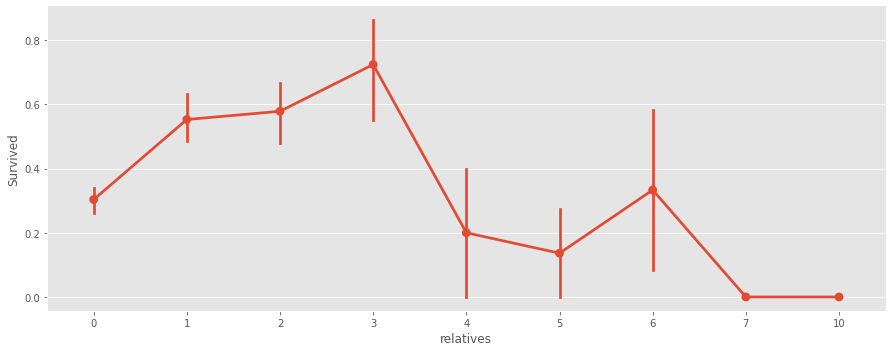

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
test_df = pd.read_csv("/content/test.csv")
train_df = pd.read_csv("/content/titanic.csv")
train_df.head(5)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
sns.barplot(x='Pclass', y='Survived', data=train_df)
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived',data=train_df, aspect = 2.5, )
train_df = train_df.drop(['PassengerId'], axis=1)
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()
train_df['Embarked'].describe()
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66,'Age']= 6
    data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)